### Module 1, Project 1

### PART 1: Importing and the IMDB Datasets

I begin by importing the packages and files necessary for this project.

In [1]:
# Import necessary packages
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
# Read each of the datasets into a Pandas dataframe
    
# IMDB datasets
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')

# Rotten Tomatoes datasets
rotten_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t', 
                               encoding = 'unicode_escape')
rotten_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', 
                             encoding = 'unicode_escape')

# Movie Database datasets
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# Box Office Mojo dataset
box_office_mojo = pd.read_csv('data/bom.movie_gross.csv')

Now that I have all of the movie files in my project, I am going to begin to inspect the data in each file to determine what data cleaning I will have to perform and how I might join these dataframes to create more meaningful tables.

  I wanted to make 'all_data' a list of all of my dataframes, and then use a for loop to iterate through
  every dataframe in 'all_data' and preview all of the .head()'s at once, but could not figure out how to do so.
  At the risk of being redundant, I made multiple calls to 'inspect_data' instead.

In [3]:
# Inspect the dataset(s) .head()
def inspect_data(dataset):
    return  dataset.head()

In [4]:
#inspect_data(imdb_name_basics)
#inspect_data(imdb_title_akas)
#inspect_data(imdb_title_basics)
#inspect_data(imdb_title_crew)
#inspect_data(imdb_title_principals)
#inspect_data(imdb_title_ratings)

After previwing all of my datasets from IMDB, I noticed some similarities. Among the dataframes, 'nconst' and 'directors' hold the same kind of data; I can merge these columns in a join. I also noticed that 'title_id' and 'tconst' can be merged. First, all of the corresponding columns will have to be renamed to match, and then set as index points for the joins. 

In [5]:
# Rename the 'nconst' column to 'directors'
imdb_name_basics = imdb_name_basics.rename({'nconst':'directors'} , axis = 1)
# Doublecheck:
#imdb_name_basics.columns

In [6]:
# Rename the 'nconst' column to 'directors'
imdb_title_principals = imdb_title_principals.rename({'nconst':'directors'} , axis = 1)
# Doublecheck:
#imdb_title_principals.columns

In [7]:
# Set the index for the 'name_basics' and 'title_principals' datasets to 'directors'
imdb_name_basics.set_index('directors', inplace=True)
imdb_title_principals.set_index('directors', inplace=True)

In [8]:
# Join 'name_basics' and 'title_principals' by the index 'directors'
imdb_set_directors = imdb_name_basics.join(imdb_title_principals, how = "inner")
# Doublecheck:
#imdb_set_directors.head()

In [9]:
# Rename the 'title_id' column to 'tconst'
imdb_title_akas = imdb_title_akas.rename({'title_id':'tconst'} , axis = 1)
# Doublecheck:
#imdb_title_akas.columns

In [10]:
# Prepare to merge tables with 'tconst' by setting all indexes to 'tconst'
# I could have used a function and a for loop to iterate through all of these
# datasets and set their index to 'tconst', but I chose to do each in their turn
# to visualize that each dataset being reassigned its index
imdb_set_directors.set_index('tconst', inplace=True)
imdb_title_akas.set_index('tconst', inplace=True)
imdb_title_crew.set_index('tconst', inplace=True)
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)

In [11]:
# Join 'set_directors' to 'title_akas' to make a larger dataframe
# I am using outer joins to make sure that no data is lost making these larger dataframes
# Although I could merge the 'ordering' columns in these datasets, I don't believe
# the data would be useful enough to do so. Rather, I will keep both columns to make sure
# I will not lose data, even though I may not use it
imdb_join_1 = imdb_set_directors.join(imdb_title_akas, how = "outer", rsuffix = '_alt')
# Doublecheck:
#imdb_join_1.head()

In [12]:
# Join 'title_crew' to 'title_basics' to make a larger dataframe
imdb_join_2 = imdb_title_crew.join(imdb_title_basics, how = "outer")
# Doublecheck:
#imdb_join_2.head()

In [13]:
# Join 'title_ratings' to larger dataframe 'imdb_join_2'
imdb_join_3 = imdb_join_2.join(imdb_title_ratings, how = "outer")
# Doublecheck:
#imdb_join_3.head()

In [14]:
# Finally, join our two large dataframes into one, representing all of IMDB's data
all_imdb = imdb_join_1.join(imdb_join_3, how = "outer")
# Doublecheck:
all_imdb = all_imdb.reset_index(drop=True)
#all_imdb.head()

Now that I have create a dataframe representing all of my data from the IMDB website, it would be a good time 
to do some data cleaning. I begin by checking how many Nan/null values are in 'all_imdb'

In [15]:
#Show how many NaN or null values are in 'all_imdb'
#all_imdb.isna().sum()

Looking a this .sum() total, it becomes clear that almost all rows and columns in my dataframe are missing data of some kind. It wouldn't do to drop Nan/null values across my whole dataframe, because then I would have a dataframe with next to no rows of data! Instead, I will first group my data by the columns I believe will contain the most informative data, and focus on the NaN/null values at another time.

Previewing 'all_imdb' I determine the most valuable columns I can .groupby() are 'runtime_minutes', 'genres', and
'averagerating'.

In [16]:
# Group 'all_imdb' by most valuable data
imdb_grouped = all_imdb.groupby([all_imdb.index])[('runtime_minutes','genres','averagerating')]
#Doublecheck:
#imdb_grouped.head()

### Question 1: 
What is the average runtime of movies on IMDB?

"all_imdb" contains NaN values in the 'runtime_minutes' column. If I am to correctly calculate the mean, I will have to drop these values from the column.

In [17]:
# Drop NaN values from the column 'runtime_minutes', and store
# these results in a variable called 'imdb_runtime'
imdb_runtime = all_imdb['runtime_minutes'].dropna()

In [18]:
# Create a function to calculate the mean
def get_mean(data):
    mean = sum(data)/len(data)
    return round(mean)

# Create a variable called 'avg_run' to hold the average runtime
avg_run = get_mean(imdb_runtime)
print(avg_run)

98


So, the average runtime for movies on IMDB is approximately 98 minutes.

### Question 2:
What is the average and most common rating for movies on IMDB?

In [19]:
# First drop all NaN/Null values in 'averagerating' and assign this new
# column to 'imdb_rating'
imdb_rating = all_imdb['averagerating'].dropna()

In [20]:
# Calculate the mean
get_mean(imdb_rating)

6

In [21]:
# Find the most common 'averagerating' cast this as an int, and then round the result
# to a one significant place
rating_mode = round(int(all_imdb['averagerating'].mode()))
print(rating_mode)

6


So, we can see that the average and most common rating for movies on IMDB is 6/10. This is informative for our dataset as a whole, but it does not give any particularly valuable information to Microsoft because these calculations lack specificity-- A better calculation would be to determine what are the top five genres of film, and, out of those genres, which scored highest among critics and audiences.

### Question 3: 
What are the top 5 genres in my IMDB dataset?

{'Drama': 427959, 'Documentary': 287475, 'Comedy': 174175, 'Comedy,Drama': 113031, 'Drama,Romance': 74974}


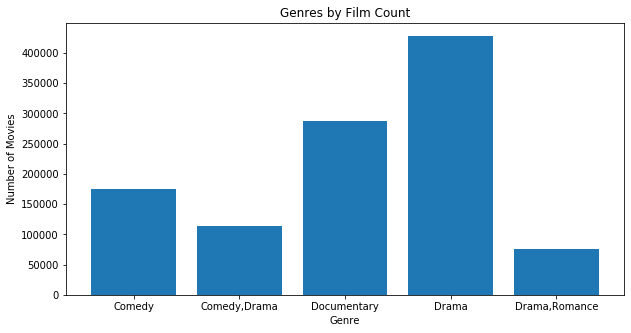

(None,
 (<Figure size 720x360 with 1 Axes>,
  <BarContainer object of 5 artists>,
  Text(0.5, 17.200000000000003, 'Genre'),
  Text(17.200000000000003, 0.5, 'Number of Movies'),
  Text(0.5, 1, 'Genres by Film Count'),
  None))

In [22]:
# Create a function to find the top 5 genres in the dataset
def top_5_genres(dataset):
    # Create an empty dictionary to hold the frequency values
    frequency_dict = {}
    # For every piece of data in the 'genres' column
    for genre in dataset['genres']:
        # If the value is not already in frequency_dict, add it
        if genre not in frequency_dict:
            frequency_dict[genre] = 1
        # If the value does already exist, add 1 to the value
        else:
            frequency_dict[genre] += 1
    # Create a dictionary with a counter that will iterate through frequency_dict and 
    # using the .most_common() method, will return the top 5
    top_5_genres = dict(Counter(frequency_dict).most_common(5))
    
     # Print the dictionary we have created, and then plot the results       
    return  print(top_5_genres), (plt.figure(figsize=(10,5)), plt.bar(*zip(*sorted(top_5_genres.items()))), plt.xlabel('Genre'),
    plt.ylabel('Number of Movies'), plt.title('Genres by Film Count'), plt.show())
# Call the function
top_5_genres(all_imdb)

So, from our equation we can see that the Top 5 Film Genres are Drama, Documentary, Comedy, Comedy/Drama, and Drama/Romance.

### Question 4: 
But which of these Genres was highest rated the most?

In [23]:
# Using the .loc method, find all instances where 'genre' is one of our top 5 genres,
# and then where the 'averagerating' for that genres >=8.
#  The length of this result will be the number of times this genre entry has been scored >= 8.
perfect_drama = len(all_imdb.loc[(all_imdb['genres'] == 'Drama') &
             (all_imdb['averagerating'] >= 8), 'genres'])

perfect_documentary = len(all_imdb.loc[(all_imdb['genres'] == 'Documentary') &
             (all_imdb['averagerating'] >= 8), 'genres']) 

perfect_comedy = len(all_imdb.loc[(all_imdb['genres'] == 'Comedy') &
             (all_imdb['averagerating'] >= 8), 'genres']) 

perfect_dromedy = len(all_imdb.loc[(all_imdb['genres'] == 'Comedy,Drama') &
             (all_imdb['averagerating'] >= 8), 'genres']) 

perfect_dromance = len(all_imdb.loc[(all_imdb['genres'] == 'Drama,Romance') &
             (all_imdb['averagerating'] >= 8), 'genres']) 

# turn the numbers found for each genre into a percent
perfect_drama_percent = perfect_drama / len(all_imdb['genres'])
perfect_documentary_percent = perfect_documentary / len(all_imdb['genres'])
perfect_comedy_percent = perfect_comedy / len(all_imdb['genres'])
perfect_dromedy_percent = perfect_dromedy / len(all_imdb['genres'])
perfect_dromance_percent = perfect_dromance / len(all_imdb['genres'])


# Assign our results to a list
perfect_movie_list = [perfect_drama, perfect_documentary, perfect_comedy, perfect_dromedy, perfect_dromance]
perfect_percent_list = [(perfect_drama_percent, perfect_documentary_percent, perfect_comedy_percent, 
                        perfect_dromedy_percent, perfect_dromance_percent)]
# Print out our list
print(perfect_movie_list)
print(perfect_percent_list)

[21234, 32362, 4800, 4002, 1244]
[(0.00713677131175228, 0.010876904643069006, 0.0016132854053127505, 0.0013450767066795057, 0.0004181098008768878)]


So, from this list we can see that Drama had 9 movies with perfect scores, Documentary with 73, Comedy with none, 'Dromedy' with 1, and Drama/Romance with none.

We can visualize this in a graph:

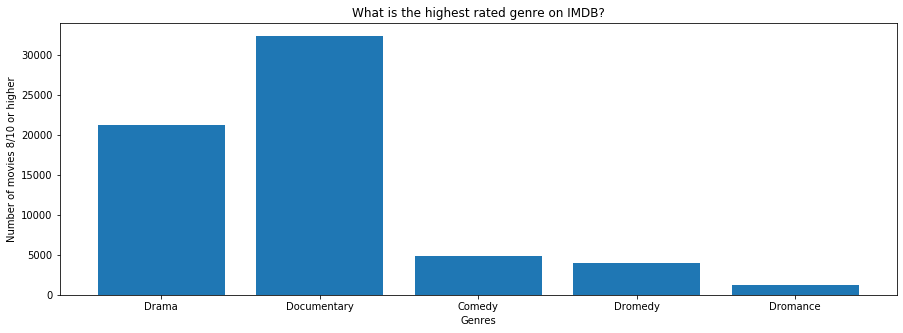

In [24]:
# Create a list to hold my top 5 genres.
genre_list = ['Drama', 'Documentary', 'Comedy', 'Dromedy', 'Dromance']
# Create a plot where x is our 'genre_list' and y is our 'perfect_movie_list'
plt.figure(figsize=(15, 5))
plt.bar(genre_list, perfect_movie_list)
plt.xlabel('Genres')
plt.ylabel('Number of movies 8/10 or higher')
plt.title('What is the highest rated genre on IMDB?')
plt.show()

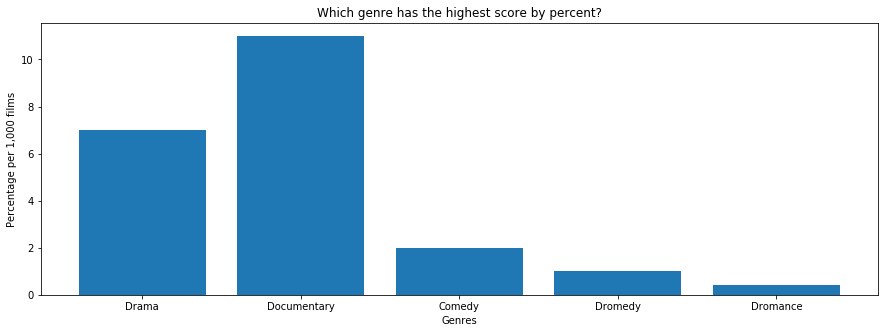

In [25]:
percents = [7, 11, 2, 1, 0.4]
# Create a plot where x is our 'genre_list' and y is our percents.
plt.figure(figsize=(15, 5))
plt.bar(genre_list, percents)
plt.xlabel('Genres')
plt.ylabel('Percentage per 1,000 films')
plt.title('Which genre has the highest score by percent?')
plt.show()

### Part 2: Rotten Tomates and The Movie Database

I begin Part 2 by investigating each of the dataframes in my Rotten Tomatoes and Movie Database files by calling my 'inspect_data' function.

In [26]:
#inspect_data(rotten_movie_info)
#inspect_data(rotten_reviews)
#inspect_data(tmdb_movies)
#inspect_data(tn_movie_budgets)

Just as I did in Part 1, I noticed that, amongst the datasets, certain columns and values were mirrored: the datasets from Rotten Tomatoes and The Movie Database each had an 'id' column by which they could be joined.

In [27]:
# Set 'id' as the index for both 'rotten_movie_info' and 'rotten_reviews'
rotten_movie_info.set_index('id', inplace=True)
rotten_reviews.set_index('id', inplace=True)

In [28]:
# Set 'id' as the index for both 'tmdb_movies' and 'tn_movie_budgets'
tmdb_movies.set_index('id', inplace=True)
tn_movie_budgets.set_index('id', inplace=True)

I also noticed that 'tmdb_movies' contained a column called 'Unnamed: 0' which Pandas considered to be a stand-in for an unspecified index column for the dataframe. I decided to remove it, since it served no purpose.

In [29]:
# Drop the column 'Unnamed: 0'
tmdb_movies.drop('Unnamed: 0', axis=1, inplace=True)

Now that my dataframes from Rotten Tomatoes and the Movie Database each have their index columns set to 'id', I can begin to join my dataframes into a larger, more valuable table.

In [30]:
# Join 'rotten_movie_info' to 'rotten_reviews'. Both dataframes share a 'release_date'
# column. I will merge these columns later. For now I will set 'rsuffix' to '_alt'
# so that both 'release_date' columns will be kept.
rotten_join = rotten_movie_info.join(rotten_reviews, how = "outer", rsuffix = "_alt")
#rotten_join.head()

In [31]:
# Join 'tmdb_movies' to 'tn_movie_budgets'. Both dataframes also share 'release_date',
# So, just as before, I will set 'rsuffix' to '_alt' so that I can merge these columns later
tmdb_join = tmdb_movies.join(tn_movie_budgets, how = "outer", rsuffix = "_alt")
#tmdb_join.head()

In [32]:
# Join 'rotten_join' and 'tmdb_join' to make a larger dataframe.
rotten_tmdb = rotten_join.join(tmdb_join, how = "outer")
# Doublecheck:
#rotten_tmdb.head()

Now that my datasets have been grouped into a larger, more valuable dataframe, I can group 'rotten_tmdb'
by those columns I believe to be the most useful.

In [33]:
# Group 'rotten_tmdb' by 'genre', 'runtime', 'vote_average', and 'worldwide_gross'
# retain the index of 'rotten_tmdb' as the index for 'rotten_tmdb_grouped'
rotten_tmdb_grouped = rotten_tmdb.groupby([rotten_tmdb.index])[('genre', 'vote_average')]
#rotten_tmdb_grouped.head()

Now, just as I did in Part 1, first I will drop NaN and null values.

In [34]:
rt_genre = rotten_tmdb['genre'].dropna()

### Question 1:
What are the Top 5 Genres of films across Rotten Tomatoes and The Movie Database?

{'Drama': 43080, 'Comedy': 26047, 'Comedy|Drama': 22236, 'Comedy|Kids and Family|Romance': 10324, 'Comedy|Romance': 10158}


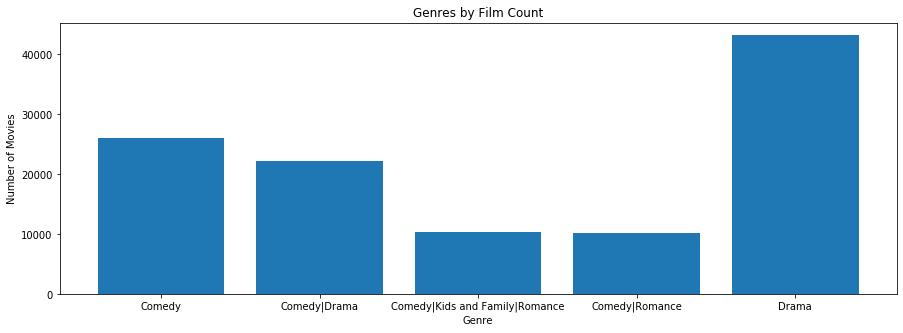

(None,
 (<Figure size 1080x360 with 1 Axes>,
  <BarContainer object of 5 artists>,
  Text(0.5, 17.200000000000003, 'Genre'),
  Text(17.200000000000003, 0.5, 'Number of Movies'),
  Text(0.5, 1, 'Genres by Film Count'),
  None))

In [35]:
# This section is self-explanatory, as we used this code before for the IMDB dataset
def top_5_genres(dataset):

    frequency_dict = {}
    
    for genre in dataset:
        if genre not in frequency_dict:
            frequency_dict[genre] = 1
        else:
            frequency_dict[genre] += 1

    top_5_genres = dict(Counter(frequency_dict).most_common(5))
            
    return  print(top_5_genres), (plt.figure(figsize=(15,5)), plt.bar(*zip(*sorted(top_5_genres.items()))), plt.xlabel('Genre'),
    plt.ylabel('Number of Movies'), plt.title('Genres by Film Count'), plt.show())

top_5_genres(rt_genre)

### Question 2:
What is the most common rating for movies on Rotten Tomatoes and The Movie Database?

In [36]:
# Same use as our IMDB dataset
rating_mode = round(int(rotten_tmdb['vote_average'].mode()))
print(rating_mode)

6


This is the same value we received when performing this calculation on the IMDB dataset. This shows that
most movies on any database are scored 6/10.

Now that we know our Top 5 Film Genres from Rotten Tomatoes and The Movie Database, we can see which genre
most consistently scored 10/10.

### Question 3:
Which film genre across scored >= 6/10 (our average rating) the most?


In [37]:
perfect_drama = len(rotten_tmdb.loc[(rotten_tmdb['genre'] == 'Drama') &
             (rotten_tmdb['vote_average'] >= 6), 'genre'])
perfect_comedy = len(rotten_tmdb.loc[(rotten_tmdb['genre'] == 'Comedy') &
             (rotten_tmdb['vote_average'] >= 6), 'genre'])
perfect_dromedy = len(rotten_tmdb.loc[(rotten_tmdb['genre'] == 'Comedy|Drama') &
             (rotten_tmdb['vote_average'] >= 6), 'genre'])
perfect_fam_rom_com = len(rotten_tmdb.loc[(rotten_tmdb['genre'] == 'Comedy|Kids and Family|Romance') &
             (rotten_tmdb['vote_average'] >= 6), 'genre'])
perfect_rom_com = len(rotten_tmdb.loc[(rotten_tmdb['genre'] == 'Comedy|Romance') &
             (rotten_tmdb['vote_average'] >= 6), 'genre'])

# turn the numbers found for each genre into a percent
perfect_drama_percent = perfect_drama / len(rotten_tmdb['genre'])
perfect_comedy_percent = perfect_comedy / len(rotten_tmdb['genre'])
perfect_dromedy_percent = perfect_dromedy / len(rotten_tmdb['genre'])
perfect_fam_rom_com_percent = perfect_fam_rom_com / len(rotten_tmdb['genre'])
perfect_rom_com_percent = perfect_rom_com / len(rotten_tmdb['genre'])

perfect_movie_list = [perfect_drama, perfect_comedy, perfect_dromedy, perfect_fam_rom_com, perfect_rom_com]
perfect_percent_list = [(perfect_drama_percent, perfect_comedy_percent, perfect_dromedy_percent,
                         perfect_fam_rom_com_percent, perfect_rom_com_percent)]
print(perfect_movie_list, perfect_percent_list)

[225, 300, 0, 0, 0] [(0.0008468452192764554, 0.001129126959035274, 0.0, 0.0, 0.0)]


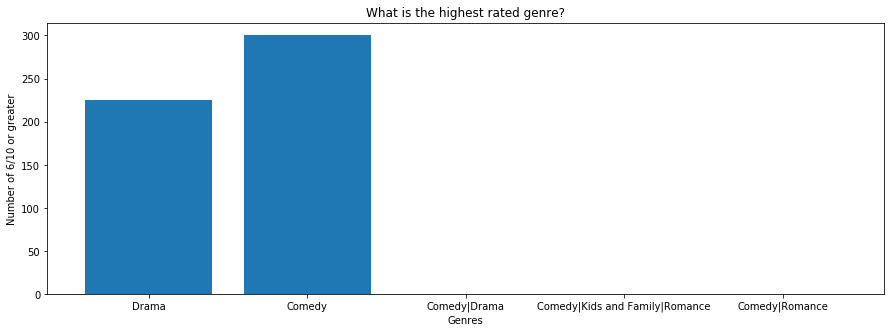

In [38]:
# Same use as our IMDB dataset
genre_list = ['Drama', 'Comedy', 'Comedy|Drama', 'Comedy|Kids and Family|Romance', 'Comedy|Romance']
plt.figure(figsize=(15, 5))
plt.bar(genre_list, perfect_movie_list)
plt.xlabel('Genres')
plt.ylabel('Number of 6/10 or greater')
plt.title('What is the highest rated genre?')
plt.show()

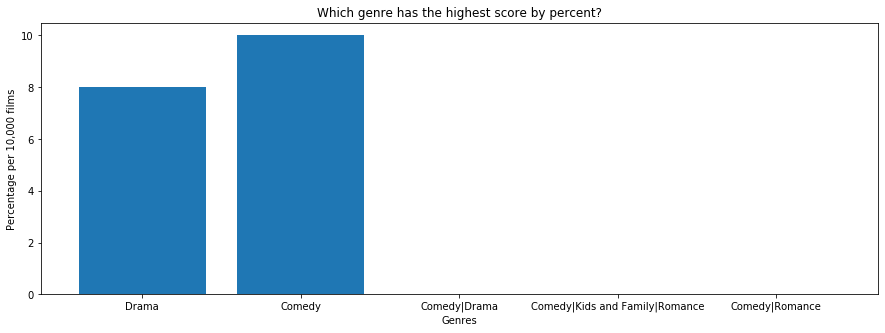

In [39]:
genre_list = ['Drama','Comedy','Comedy|Drama','Comedy|Kids and Family|Romance','Comedy|Romance']
percents = [8, 10, 0, 0, 0]
# Create a plot where x is our 'genre_list' and y is our percents
plt.figure(figsize=(15, 5))
plt.bar(genre_list, percents)
plt.xlabel('Genres')
plt.ylabel('Percentage per 10,000 films')
plt.title('Which genre has the highest score by percent?')
plt.show()

### Part 3: Gross

In [40]:
# Preliminary EDA for Box Office Mojo
inspect_data(box_office_mojo)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [41]:
inspect_data(tn_movie_budgets)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The Box Office Mojo Dataset shares a 'domestic_gross' column with tn_movie_budgets. As such, we can use these columns to generate some valuable insights into our data.

In [42]:
# Change $ to int
tn_movie_budgets['production_budget'] = (tn_movie_budgets['production_budget']
                                         .str.replace('$','')
                                         .str.replace(',','')
                                         .astype(int))

tn_movie_budgets['domestic_gross'] = (tn_movie_budgets['domestic_gross']
                                         .str.replace('$','')
                                         .str.replace(',','')
                                         .astype(int))

tn_movie_budgets['worldwide_gross'] = (tn_movie_budgets['worldwide_gross']
                                         .str.replace('$','')
                                         .str.replace(',','')
                                         .astype(int))

In [43]:
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [44]:
mojo_gross = box_office_mojo['domestic_gross'].dropna()
mojo_title = box_office_mojo['title'].dropna()

In [45]:
top_mojo = mojo_gross.nlargest(5)
print(top_mojo)

1872    936700000.0
3080    700100000.0
3079    678800000.0
1873    652300000.0
727     623400000.0
Name: domestic_gross, dtype: float64


In [46]:
top_film = box_office_mojo.loc[box_office_mojo['domestic_gross'] == 936700000.0]
top_film

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015


In [47]:
second_film = box_office_mojo.loc[box_office_mojo['domestic_gross'] == 700100000.0]
second_film

,title,studio,domestic_gross,foreign_gross,year
3080,Black Panther,BV,700100000.0,646900000,2018


In [48]:
third_film = box_office_mojo.loc[box_office_mojo['domestic_gross'] == 678800000.0]
third_film

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018


In [49]:
fourth_film = box_office_mojo.loc[box_office_mojo['domestic_gross'] == 652300000.0]
fourth_film

,title,studio,domestic_gross,foreign_gross,year
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [50]:
fifth_film = box_office_mojo.loc[box_office_mojo['domestic_gross'] == 623400000.0]
fifth_film

,title,studio,domestic_gross,foreign_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


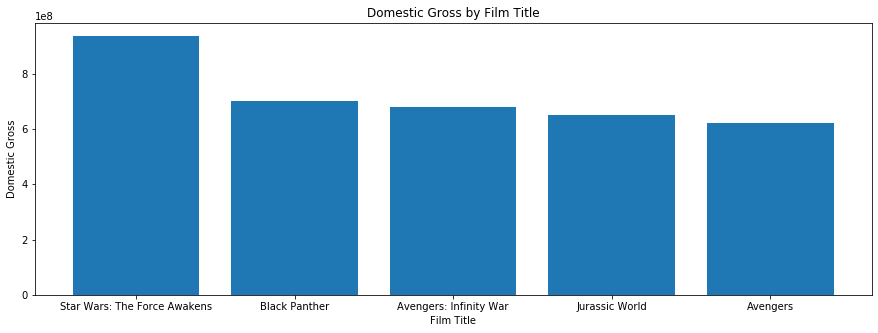

In [51]:
movie_titles = ['Star Wars: The Force Awakens','Black Panther','Avengers: Infinity War','Jurassic World','Avengers']
plt.figure(figsize=(15, 5))
plt.bar(movie_titles, top_mojo)
plt.xlabel('Film Title')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross by Film Title')
plt.show()

### Part 4: Conclusion

Our results for IMDB, and Rotten Tomatoes/The Movie Database make it clear that not only are Dramas some of the most made films, they also consistently score higher than other genres among audiences. But the market is oversaturated with Dramas. Comedies score almost just as high. And, furthermore, Action movies seem to make the most money. As such, Microsoft's best bet would be to make a Comedy or an Action film.